<a href="https://colab.research.google.com/github/Avnish3909/SETI-Telescope-Analysis-CNN/blob/main/SETI_Telescope_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• Prepare a detailed python notebook using CNN for classifying the radio signals from deep
space using Keras from the SETI Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [ ]:
import os

dropbox_link = 'https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0'
output_file = 'data.zip'
data_folder = 'DATASET'

os.system(f'curl -L -o {output_file} {dropbox_link}')
os.system(f'unzip {output_file} -d {data_folder}')

if os.path.exists(output_file):
    print("Downloaded ZIP file.")
else:
    print("Error: Download failed.")

if os.path.exists(data_folder):
    print("Extracted ZIP file.")
else:
    print("Error: Extraction failed.")



Downloaded ZIP file.
Extracted ZIP file.


In [ ]:
train_images_path = '/content/DATASET/train/images.csv'
train_labels_path = '/content/DATASET/train/labels.csv'
val_images_path = '/content/DATASET/valid/images (1).csv'
val_labels_path = '/content/DATASET/valid/labels (1).csv'




train_images = pd.read_csv(train_images_path)
train_labels = pd.read_csv(train_labels_path)
val_images = pd.read_csv(val_images_path)
val_labels =  pd.read_csv(val_labels_path)

In [ ]:
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of validation images:", val_images.shape)
print("Shape of validation labels:", val_labels.shape)

Shape of training images: (3199, 8192)
Shape of training labels: (3199, 4)
Shape of validation images: (799, 8192)
Shape of validation labels: (799, 4)


In [ ]:
train_images.head()

,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882.1,...,0.682353.349,0.611765.91,0.650980.397,0.658824.443,0.600000.48,0.603922.77,0.654902.426,0.694118.222,0.658824.444,0.666667.441
0,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
1,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
2,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
3,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
4,0.694118,0.682353,0.705882,0.705882,0.666667,0.694118,0.674510,0.713726,0.690196,0.709804,...,0.658824,0.698039,0.694118,0.709804,0.725490,0.694118,0.729412,0.701961,0.694118,0.709804


In [ ]:
train_labels.head()

,1.000000,0.000000,0.000000.1,0.000000.2
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
from collections import Counter
import random


X_train = np.array(train_images.values).reshape(len(train_images), 64, 128, 1)
X_val = np.array(val_images.values).reshape(len(val_images), 64, 128, 1)
print(X_train.shape)
print(X_val.shape)

y_train = np.array(train_labels.values)
y_val = np.array(val_labels.values)
print(y_train.shape)
print(y_val.shape)

labels = ["squiggle", "narrowband", "narrowbanddrd", "noise"]
labels_map = {i:label for i, label in enumerate(labels)}
labels_map

train_labels = [labels_map[np.argmax(y_train[i])] for i in range(len(y_train))]
dict(Counter(train_labels))

(3199, 64, 128, 1)
(799, 64, 128, 1)
(3199, 4)
(799, 4)


{'squiggle': 799, 'narrowbanddrd': 800, 'noise': 800, 'narrowband': 800}

In [ ]:
labels = ["squiggle", "narrowband", "narrowbanddrd", "noise"]
labels_map = {i:label for i, label in enumerate(labels)}
labels_map

{0: 'squiggle', 1: 'narrowband', 2: 'narrowbanddrd', 3: 'noise'}

In [ ]:
n = 5

narrow_band = [indx for indx, val in enumerate(train_labels) if val=="narrowband"]
sample_nb = random.sample(narrow_band, n)
print(sample_nb)

narrowbanddrd = [indx for indx, val in enumerate(train_labels) if val=="narrowbanddrd"]
sample_nbdrd = random.sample(narrowbanddrd, n)
print(sample_nbdrd)

noise = [indx for indx, val in enumerate(train_labels) if val=="noise"]
sample_noise = random.sample(noise, n)
print(sample_noise)

squiggle = [indx for indx, val in enumerate(train_labels) if val=="squiggle"]
sample_squiggle = random.sample(squiggle, n)
sample_squiggle

[2784, 2944, 3080, 2730, 2982]
[854, 1468, 1107, 1364, 1050]
[2089, 2277, 1625, 1703, 1914]


[25, 59, 304, 464, 736]

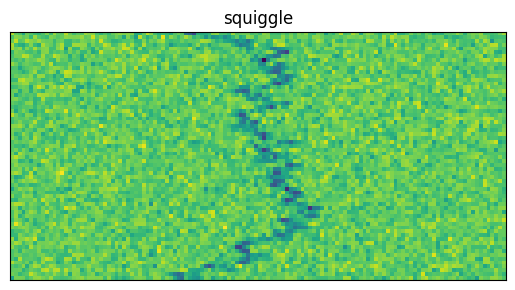

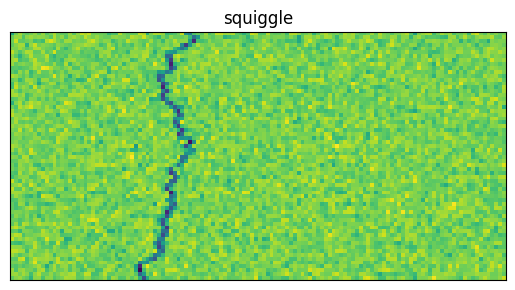

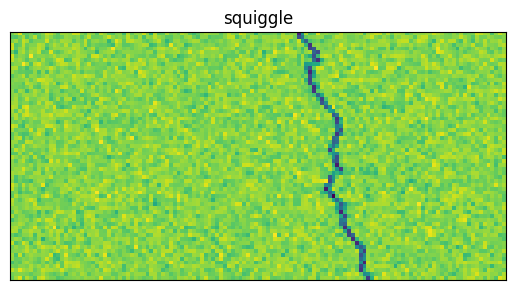

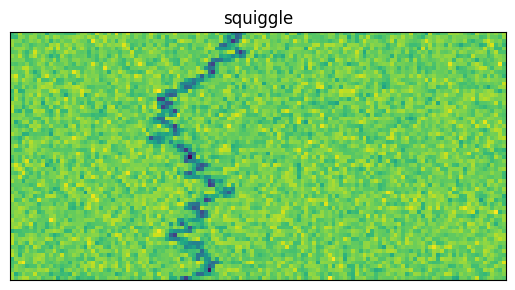

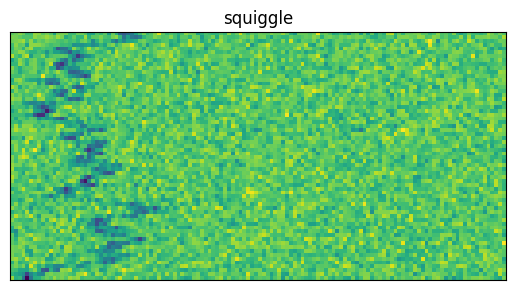

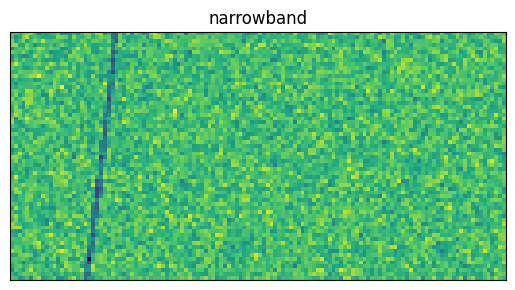

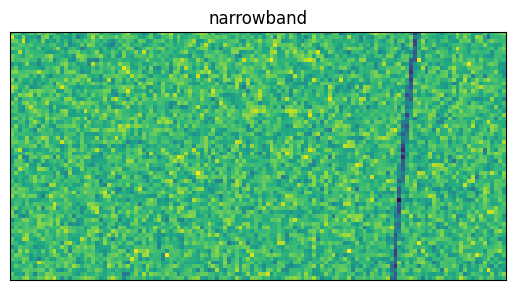

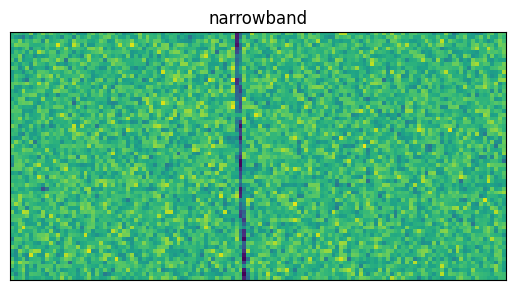

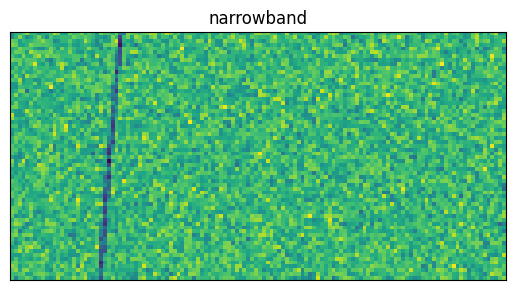

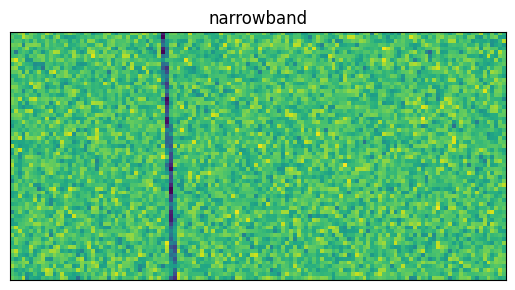

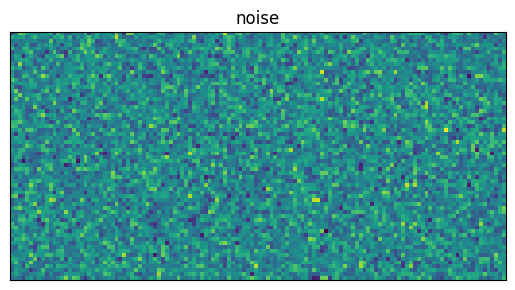

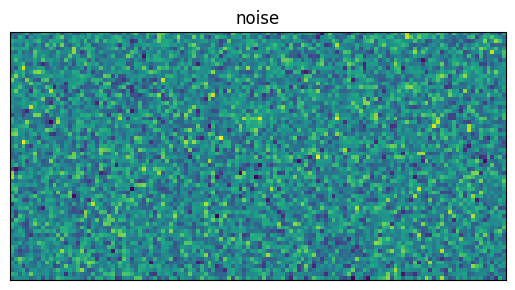

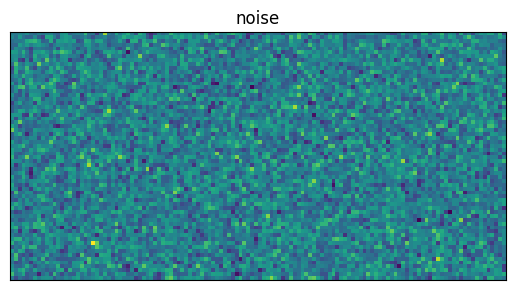

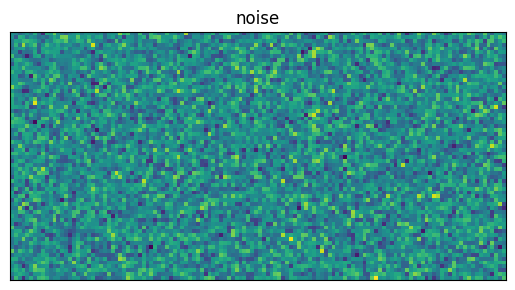

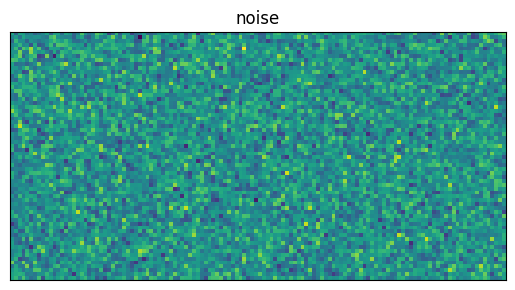

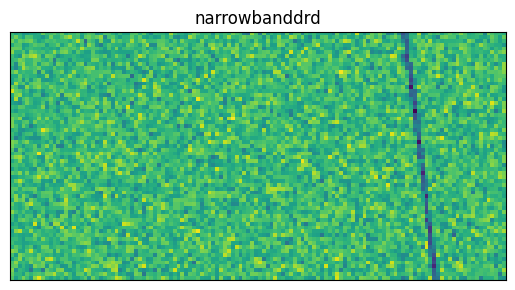

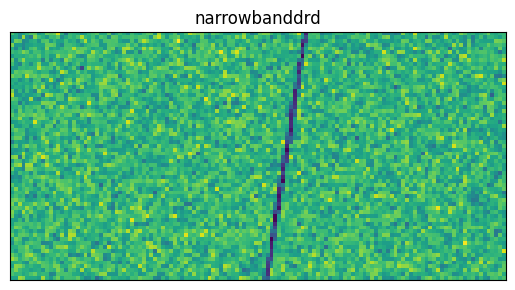

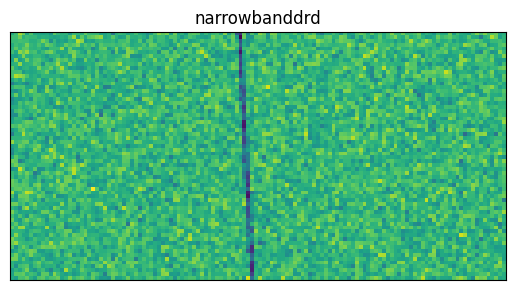

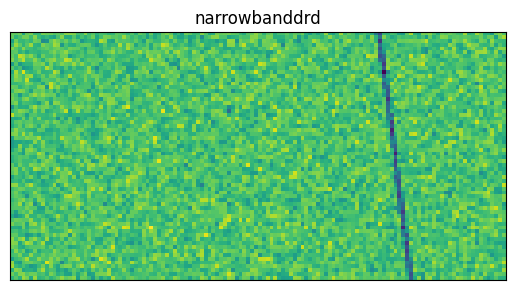

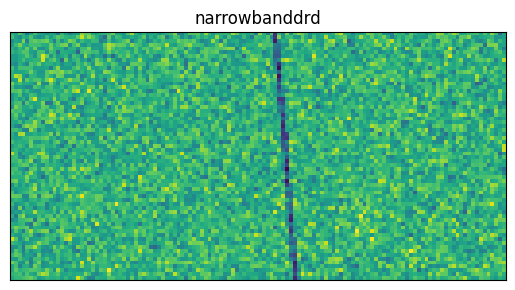

In [ ]:
from matplotlib import pyplot as plt


def plot(X_train, y_train, indx_ls):
  for indx in indx_ls:
    plt.imshow(np.squeeze(X_train[indx]), interpolation='nearest')
    plt.title(labels_map[np.argmax(y_train[indx])])
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot(X_train, y_train, sample_squiggle)

plot(X_train, y_train, sample_nb)

plot(X_train, y_train, sample_noise)

plot(X_train, y_train, sample_nbdrd)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
train_datagen.fit(X_train)

val_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
val_datagen.fit(X_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(64 , (5 , 5) , padding = "same" , input_shape = (64 , 128 , 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(4 , activation="softmax"))

In [ ]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = initial_learning_rate,
                decay_steps = 5,
                decay_rate = 0.96,
                staircase = True
)
optimizers = Adam(learning_rate = lr_schedule)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 128, 64)       1664      
                                                                 
 batch_normalization_4 (Bat  (None, 64, 128, 64)       256       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 64, 128, 64)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 32, 64, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 64, 64)       

In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [checkpoint]

batch_size = 32

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_val)//batch_size,
    epochs=30,
    callbacks=callbacks)

Epoch 1/30
99/99 [==============================] - 9s 93ms/step - loss: 0.5267 - accuracy: 0.7054 - val_loss: 0.5014 - val_accuracy: 0.6979
Epoch 2/30
99/99 [==============================] - 5s 50ms/step - loss: 0.5467 - accuracy: 0.6916 - val_loss: 0.5080 - val_accuracy: 0.6966
Epoch 3/30
99/99 [==============================] - 6s 63ms/step - loss: 0.5254 - accuracy: 0.6928 - val_loss: 0.5032 - val_accuracy: 0.7005
Epoch 4/30
99/99 [==============================] - 5s 54ms/step - loss: 0.5274 - accuracy: 0.6966 - val_loss: 0.5035 - val_accuracy: 0.6927
Epoch 5/30
99/99 [==============================] - 6s 60ms/step - loss: 0.5373 - accuracy: 0.6950 - val_loss: 0.5015 - val_accuracy: 0.6979
Epoch 6/30
99/99 [==============================] - 5s 55ms/step - loss: 0.5367 - accuracy: 0.6877 - val_loss: 0.5034 - val_accuracy: 0.6966
Epoch 7/30
99/99 [==============================] - 6s 56ms/step - loss: 0.5329 - accuracy: 0.6943 - val_loss: 0.4991 - val_accuracy: 0.6979
Epoch 8/30
99

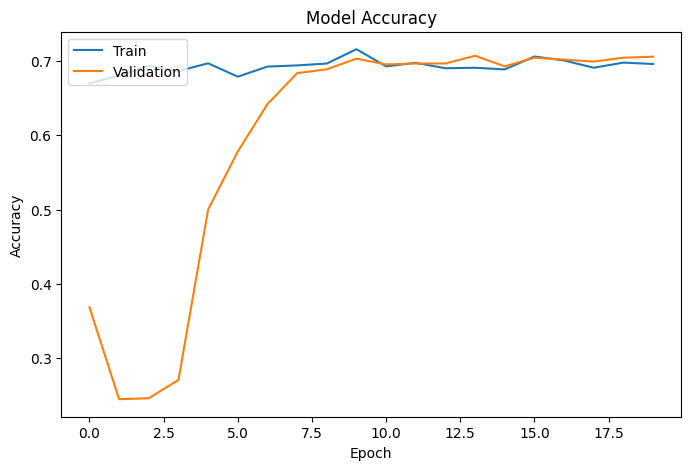

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

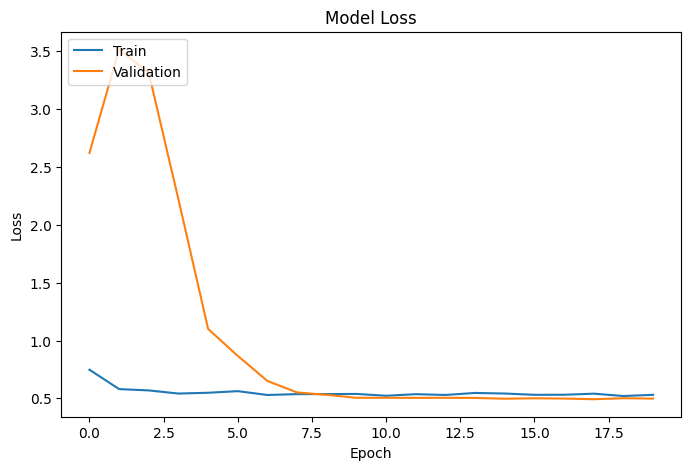

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

25/25 [==============================] - 0s 13ms/step - loss: 0.4894 - accuracy: 0.7046


[0.4893978238105774, 0.7046307921409607]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(X_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       199
           1       0.47      0.60      0.53       200
           2       0.46      0.30      0.36       200
           3       1.00      1.00      1.00       200

    accuracy                           0.70       799
   macro avg       0.70      0.70      0.70       799
weighted avg       0.70      0.70      0.69       799

Classification accuracy: 0.704631
